In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
path=r'D:\college\sem2\Data Mining and Machine learning\Assignment_Data_mining\Diabe.csv'
rawdata = pd.read_csv(path)

rawdata.head()



,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

##################################### 1 ######################################


nrow, ncol = rawdata.shape
print(nrow,ncol)
predictors=rawdata.iloc[:,0:ncol-1]
#print(predictors)
target=rawdata.iloc[:,-1]
#print(target)
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)

768 9


In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)


clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)
probMLP=clf.predict_proba(pred_test)
print("Accuracy score of our model with MLP :", accuracy_score(tar_test, predictions1))
scores = cross_val_score(clf, predictors, target, cv=10)
print("Accuracy score of our model with MLP under cross validation :", scores.mean())

C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy score of our model with MLP : 0.6060606060606061


C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimizati

Accuracy score of our model with MLP under cross validation : 0.6770847573479152


In [5]:
######################################## 2############################
import matplotlib.pyplot as plt

X_train, X_test = pred_train,pred_test
y_train, y_test =  tar_train,tar_test
#
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=0, tol=1e-8, random_state=1,
                    learning_rate_init=.01)

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 64
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
mlploss = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]

        mlp.partial_fit(X_train.iloc[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(1 - mlp.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(1 - mlp.score(X_test, y_test))

    # compute loss

    mlploss.append(mlp.loss_)
    epoch += 1

""" Plot """
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(scores_train)
ax[0].set_title('Train Error')
ax[1].plot(mlploss)
ax[1].set_title('Train Loss')
ax[2].plot(scores_test)
ax[2].set_title('Test Error')
fig.suptitle("Error vs Loss over epochs", fontsize=14)
fig.savefig('D:\college\sem2\Data Mining and Machine learning\Assignment_Data_mining\LossCurve.png')
plt.show()

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24


<Figure size 640x480 with 3 Axes>

C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimizati

Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.606061
(19 , 1)           0.658009
(18 , 2)           0.658009
(17 , 3)           0.445887
(16 , 4)           0.658009
(15 , 5)           0.558442
(14 , 6)           0.662338
(13 , 7)           0.649351
(12 , 8)           0.666667
(11 , 9)           0.606061
(10 , 10)          0.662338
(9 , 11)           0.645022
(8 , 12)           0.731602
(7 , 13)           0.649351
(6 , 14)           0.645022
(5 , 15)           0.588745
(4 , 16)           0.658009
(3 , 17)           0.666667
(2 , 18)           0.65368
(1 , 19)           0.683983


C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


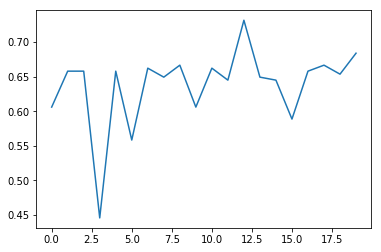

In [6]:
########################################## 3 ##########################################

# print(20,0, accuracy_score(tar_test, predictions1))
# acc=[]
# for i in range(19):

#  clf = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
#  clf.fit(pred_train, tar_train)
#  predictions1 = clf.predict(pred_test)
#  # probMLP = clf.predict_proba(pred_test)
#  print(20-i-1,i+1, accuracy_score(tar_test, predictions1))
#  acc.append(accuracy_score(tar_test, predictions1))


# plt.plot(acc)
# plt.show()

acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
     # , alpha=1e-4,
     #                solver='sgd', verbose=0, tol=1e-8, random_state=1,
     #                learning_rate_init=.01)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 # probMLP = clf.predict_proba(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 # print(20-i-1,i+1, accuracy_score(tar_test, predictions1))
 acc_plt.append(acca[1])
 acc_score.append(acca)


from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()


epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24


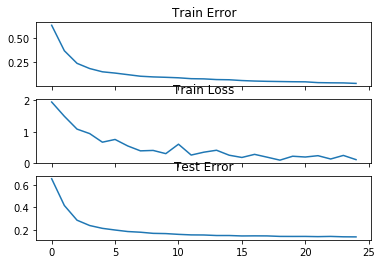

In [7]:
from sklearn.datasets import fetch_openml

np.random.seed(1)

""" Example based on sklearn's docs """
mnist = fetch_openml('mnist_784')
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=0, tol=1e-8, random_state=1,
                    learning_rate_init=.01)


N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 64
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
mlploss = []


# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(1-mlp.score(X_train, y_train))
    
     # SCORE TEST
    scores_test.append(1-mlp.score(X_test, y_test))
    
    # compute loss
    
    mlploss.append(mlp.loss_)
    epoch += 1

""" Plot """
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(scores_train)
ax[0].set_title('Train Error')
ax[1].plot(mlploss)
ax[1].set_title('Train Loss')
ax[2].plot(scores_test)
ax[2].set_title('Test Error')

plt.show()

In [6]:
path=r'D:\college\sem2\Data Mining and Machine learning\Assignment_Data_mining\Heart_data.csv'
heartData = pd.read_csv(path)

heartData.head()

,(age),(sex),(cp),(trestbps),(chol),(fbs),(restecg),(thalach),(exang),(oldpeak),(slope),(ca),(thal),(the predicted attribute)
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [7]:


heartData.isnull().sum()

(age)                        0
(sex)                        0
(cp)                         0
(trestbps)                   0
(chol)                       0
(fbs)                        0
(restecg)                    0
(thalach)                    0
(exang)                      0
(oldpeak)                    0
(slope)                      0
(ca)                         4
(thal)                       2
(the predicted attribute)    0
dtype: int64

In [10]:
heartData['(ca)'] = heartData['(ca)'].fillna(heartData['(ca)'].mean())
heartData['(thal)'] = heartData['(thal)'].fillna(heartData['(thal)'].mean())


nrow, ncol = heartData.shape
print(nrow,ncol)
predictors=heartData.iloc[:,0:ncol-1]
#print(predictors)
target=heartData.iloc[:,-1]
#print(target)
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)

303 14


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)


clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)
probMLP=clf.predict_proba(pred_test)
print("Accuracy score of our model with MLP :", accuracy_score(tar_test, predictions1))


Accuracy score of our model with MLP : 0.0989010989010989


C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimizati

Nuerons      Accuracy Score
---------  ----------------
(20 , 0)          0.0989011
(19 , 1)          0.527473
(18 , 2)          0.527473
(17 , 3)          0.021978
(16 , 4)          0.21978
(15 , 5)          0.428571
(14 , 6)          0.505495
(13 , 7)          0.450549
(12 , 8)          0.527473
(11 , 9)          0.582418
(10 , 10)         0.494505
(9 , 11)          0.274725
(8 , 12)          0.483516
(7 , 13)          0.472527
(6 , 14)          0.527473
(5 , 15)          0.516484
(4 , 16)          0.483516
(3 , 17)          0.483516
(2 , 18)          0.527473
(1 , 19)          0.527473


C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


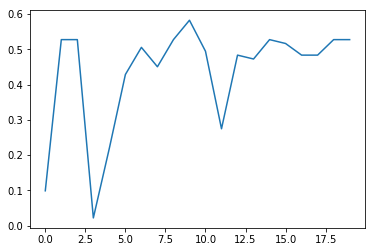

In [12]:
acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
     # , alpha=1e-4,
     #                solver='sgd', verbose=0, tol=1e-8, random_state=1,
     #                learning_rate_init=.01)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 # probMLP = clf.predict_proba(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 # print(20-i-1,i+1, accuracy_score(tar_test, predictions1))
 acc_plt.append(acca[1])
 acc_score.append(acca)


from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()


In [4]:
path=r'D:\college\sem2\Data Mining and Machine learning\Assignment_Data_mining\HCV-Egy-Data.csv'
hcVirus = pd.read_csv(path)

hcVirus.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [5]:
hcVirus.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [105]:
nrow, ncol = hcVirus.shape
print(nrow,ncol)
predictors=hcVirus.iloc[:,0:ncol-1]
print(predictors)
target=hcVirus.iloc[:,-1]

print(target)
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)

1385 29
      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
5       58       2   22      2               2          2          1   
6       42       2   26      1               1          2          2   
7       48       2   30      1               1          2          2   
8       44       1   23      1               1          2          2   
9       45       1   30      2               1          2          2   
10      37       2   24      2               1          2          1   
11      36       1   22      2               2          1          1   
12      45       2   25      2               1          

In [109]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)


clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)

probMLP=clf.predict_proba(pred_test)
print("Accuracy score of our model with MLP :", accuracy_score(tar_test, predictions1))

Accuracy score of our model with MLP : 0.23557692307692307


C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.235577
(19 , 1)           0.21875
(18 , 2)           0.21875
(17 , 3)           0.213942
(16 , 4)           0.262019
(15 , 5)           0.242788
(14 , 6)           0.228365
(13 , 7)           0.262019
(12 , 8)           0.259615
(11 , 9)           0.278846
(10 , 10)          0.228365
(9 , 11)           0.252404
(8 , 12)           0.276442
(7 , 13)           0.257212
(6 , 14)           0.25
(5 , 15)           0.247596
(4 , 16)           0.262019
(3 , 17)           0.242788
(2 , 18)           0.254808
(1 , 19)           0.259615


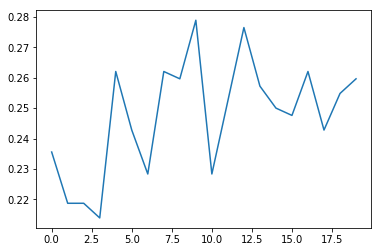

In [110]:
acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
     # , alpha=1e-4,
     #                solver='sgd', verbose=0, tol=1e-8, random_state=1,
     #                learning_rate_init=.01)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 # probMLP = clf.predict_proba(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 # print(20-i-1,i+1, accuracy_score(tar_test, predictions1))
 acc_plt.append(acca[1])
 acc_score.append(acca)


from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()


In [45]:
path=r'D:\college\sem2\Data Mining and Machine learning\Assignment_Data_mining\Parliament.csv'
parliament = pd.read_csv(path)

parliament.head()

,Class name 2 (democrat republican),export-administration-act-south-africa,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,ph1sician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,s1nfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [46]:
parliament.isnull().sum()

Class name 2 (democrat republican)            0
 export-administration-act-south-africa      12
handicapped-infants                          48
water-project-cost-sharing                   11
adoption-of-the-budget-resolution            11
ph1sician-fee-freeze                         15
el-salvador-aid                              11
religious-groups-in-schools                  14
anti-satellite-test-ban                      15
aid-to-nicaraguan-contras                    22
mx-missile                                    7
immigration                                  21
s1nfuels-corporation-cutback                 31
education-spending                           25
superfund-right-to-sue                       17
crime                                        28
duty-free-exports                           104
dtype: int64

In [47]:
parliament = parliament.fillna(0)

In [48]:
nrow, ncol = parliament.shape
print(nrow,ncol)
predictors=parliament.iloc[:,1:ncol]
print(predictors)
target=parliament.iloc[:,0]

print(target)
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)

435 17
      export-administration-act-south-africa   handicapped-infants   \
0                                         0.0                   1.0   
1                                         0.0                   1.0   
2                                         0.0                   1.0   
3                                         0.0                   1.0   
4                                         1.0                   1.0   
5                                         0.0                   1.0   
6                                         0.0                   1.0   
7                                         0.0                   1.0   
8                                         0.0                   1.0   
9                                         1.0                   1.0   
10                                        0.0                   1.0   
11                                        0.0                   1.0   
12                                        0.0                   1.0   

In [49]:
clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)


clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)
probMLP=clf.predict_proba(pred_test)
print("Accuracy score of our model with MLP :", accuracy_score(tar_test, predictions1))

Accuracy score of our model with MLP : 0.9007633587786259


C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1050) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.900763
(19 , 1)           0.931298
(18 , 2)           0.946565
(17 , 3)           0.938931
(16 , 4)           0.938931
(15 , 5)           0.938931
(14 , 6)           0.931298
(13 , 7)           0.923664
(12 , 8)           0.946565
(11 , 9)           0.923664
(10 , 10)          0.954198
(9 , 11)           0.931298
(8 , 12)           0.908397
(7 , 13)           0.938931
(6 , 14)           0.938931
(5 , 15)           0.923664
(4 , 16)           0.938931
(3 , 17)           0.931298
(2 , 18)           0.923664
(1 , 19)           0.900763


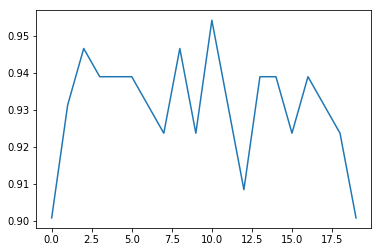

In [50]:
acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=1050)
     # , alpha=1e-4,
     #                solver='sgd', verbose=0, tol=1e-8, random_state=1,
     #                learning_rate_init=.01)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 # probMLP = clf.predict_proba(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 # print(20-i-1,i+1, accuracy_score(tar_test, predictions1))
 acc_plt.append(acca[1])
 acc_score.append(acca)


from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()

In [58]:
path=r'D:\college\sem2\Data Mining and Machine learning\Assignment_Data_mining\car.csv'
car = pd.read_csv(path)

car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

str_class = ['class','buying','maint','lug_boot','safety']
for i in str_class:
 car[i]= label_encoder.fit_transform(car[i])

car.persons = car.persons.replace({'more':6})
car.doors = car.doors.replace({'5more':5})
    

In [68]:
car.head(30)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2
5,3,3,2,2,1,0,2
6,3,3,2,2,0,1,2
7,3,3,2,2,0,2,2
8,3,3,2,2,0,0,2
9,3,3,2,4,2,1,2


In [69]:
nrow, ncol = car.shape
print(nrow,ncol)
predictors=car.iloc[:,0:ncol-1]
print(predictors)
target=car.iloc[:,-1]

print(target)
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)

1728 7
      buying  maint doors persons  lug_boot  safety
0          3      3     2       2         2       1
1          3      3     2       2         2       2
2          3      3     2       2         2       0
3          3      3     2       2         1       1
4          3      3     2       2         1       2
5          3      3     2       2         1       0
6          3      3     2       2         0       1
7          3      3     2       2         0       2
8          3      3     2       2         0       0
9          3      3     2       4         2       1
10         3      3     2       4         2       2
11         3      3     2       4         2       0
12         3      3     2       4         1       1
13         3      3     2       4         1       2
14         3      3     2       4         1       0
15         3      3     2       4         0       1
16         3      3     2       4         0       2
17         3      3     2       4         0       0
18   

In [70]:
clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)


clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)
probMLP=clf.predict_proba(pred_test)
print("Accuracy score of our model with MLP :", accuracy_score(tar_test, predictions1))

Accuracy score of our model with MLP : 0.5703275529865125


C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.570328
(19 , 1)           0.587669
(18 , 2)           0.707129
(17 , 3)           0.608863
(16 , 4)           0.67052
(15 , 5)           0.614644
(14 , 6)           0.657033
(13 , 7)           0.522158
(12 , 8)           0.720617
(11 , 9)           0.66474
(10 , 10)          0.691715
(9 , 11)           0.691715
(8 , 12)           0.637765
(7 , 13)           0.533719
(6 , 14)           0.668593
(5 , 15)           0.55684
(4 , 16)           0.537572
(3 , 17)           0.516378
(2 , 18)           0.583815
(1 , 19)           0.587669


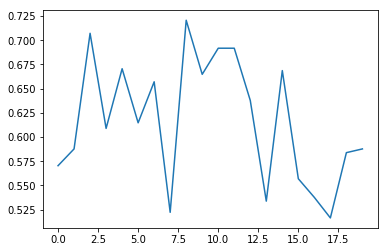

In [71]:
acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=1050)
     # , alpha=1e-4,
     #                solver='sgd', verbose=0, tol=1e-8, random_state=1,
     #                learning_rate_init=.01)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 # probMLP = clf.predict_proba(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 # print(20-i-1,i+1, accuracy_score(tar_test, predictions1))
 acc_plt.append(acca[1])
 acc_score.append(acca)


from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()